In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dari folder data (ubah path jika perlu)
df_match = pd.read_csv("../data/dim_match_summary.csv")
df_players = pd.read_csv("../data/dim_players.csv")
df_batting = pd.read_csv("../data/fact_bating_summary.csv")
df_bowling = pd.read_csv("../data/fact_bowling_summary.csv")

# 1. Cek data
display(df_match.head())
display(df_players.head())
display(df_batting.head())
display(df_bowling.head())


,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


batsmanName
Virat Kohli         296
Max O'Dowd          242
Suryakumar Yadav    239
Jos Buttler(c)      225
Kusal Mendis        223
Sikandar Raza       219
Pathum Nissanka     214
Alex Hales          212
Lorcan Tucker       204
Glenn Phillips      201
Name: runs, dtype: int64


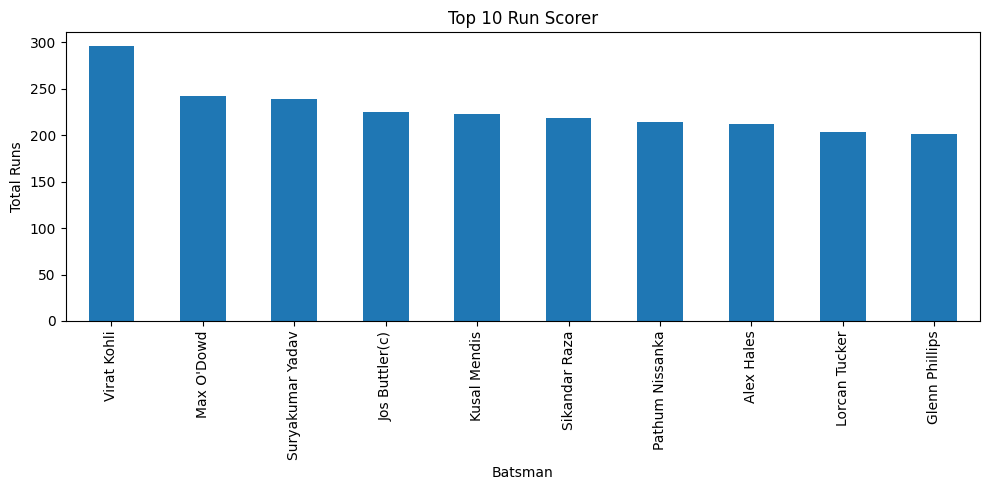

In [2]:
# Top 10 batsman berdasarkan total run
top_bat = (
    df_batting.groupby("batsmanName")["runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_bat)

top_bat.plot(kind="bar", figsize=(10,5), title="Top 10 Run Scorer")
plt.ylabel("Total Runs")
plt.xlabel("Batsman")
plt.tight_layout()
plt.show()


bowlerName
Wanindu Hasaranga de Silva    15
Bas de Leede                  13
Sam Curran                    13
Blessing Muzarabani           12
Shaheen Shah Afridi           11
Paul van Meekeren             11
Anrich Nortje                 11
Josh Little                   11
Shadab Khan                   11
Arshdeep Singh                10
Name: wickets, dtype: int64


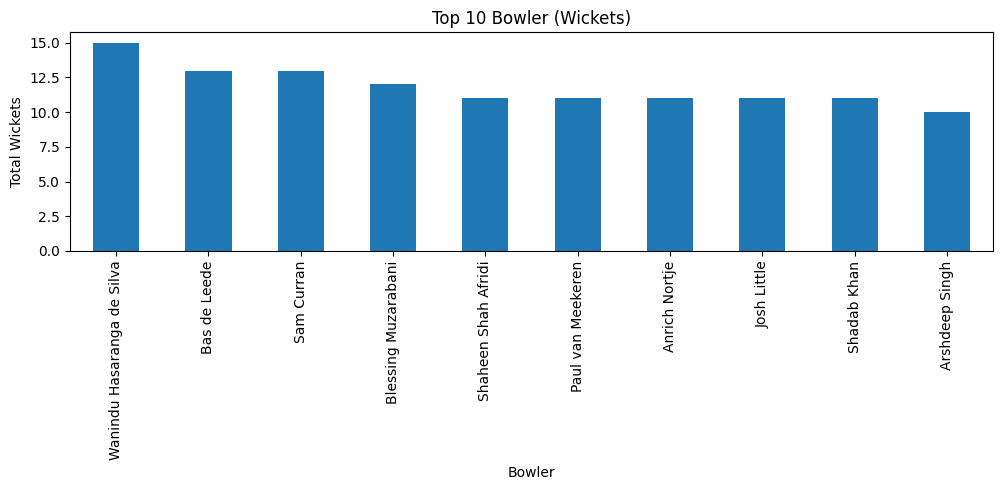

In [3]:
# Top 10 bowler berdasarkan wicket
top_bowler = (
    df_bowling.groupby("bowlerName")["wickets"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_bowler)

top_bowler.plot(kind="bar", figsize=(10,5), title="Top 10 Bowler (Wickets)")
plt.ylabel("Total Wickets")
plt.xlabel("Bowler")
plt.tight_layout()
plt.show()


winner
England        5
Pakistan       4
Netherlands    4
India          4
Sri Lanka      4
abandoned      3
New Zealand    3
Zimbabwe       3
Ireland        3
Australia      3
Name: count, dtype: int64


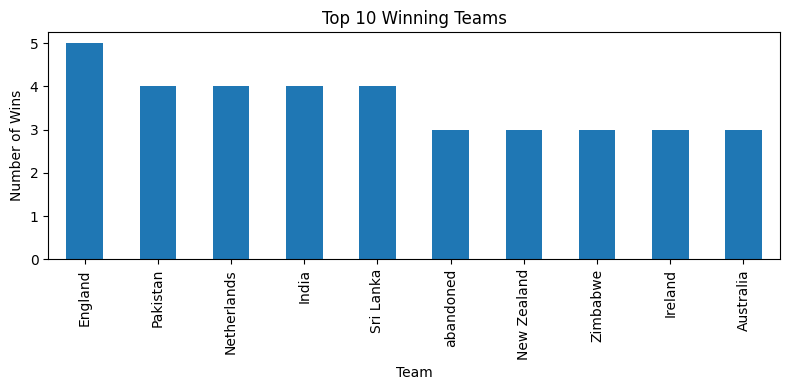

In [4]:
# Top 10 winning team
win_counts = df_match['winner'].value_counts().head(10)
print(win_counts)

win_counts.plot(kind="bar", figsize=(8, 4), title="Top 10 Winning Teams")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.tight_layout()
plt.show()
